In [1]:
import xarray as xr
from products.snow_cover_product import VIIRSMeteoFrancePrototype, VNP10A1, VJ110A1
from postprocess.general_purpose import open_reduced_dataset
from winter_year import WinterYear

wy = WinterYear(2023,2024)
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/'
product_list = [VIIRSMeteoFrancePrototype(), VNP10A1(), VJ110A1()]
analyses_dict = {}
for product in product_list:
    analyses_dict.update({product.name: open_reduced_dataset(product=product, analysis_folder=analysis_folder, analysis_type='uncertainty')}) 
selection_dict = {k: v.sel(time=slice('2023-11','2024-06')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict.items()}

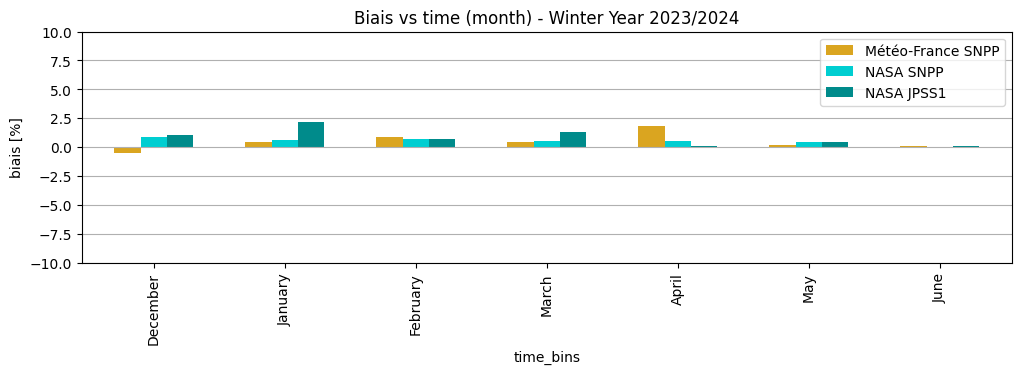

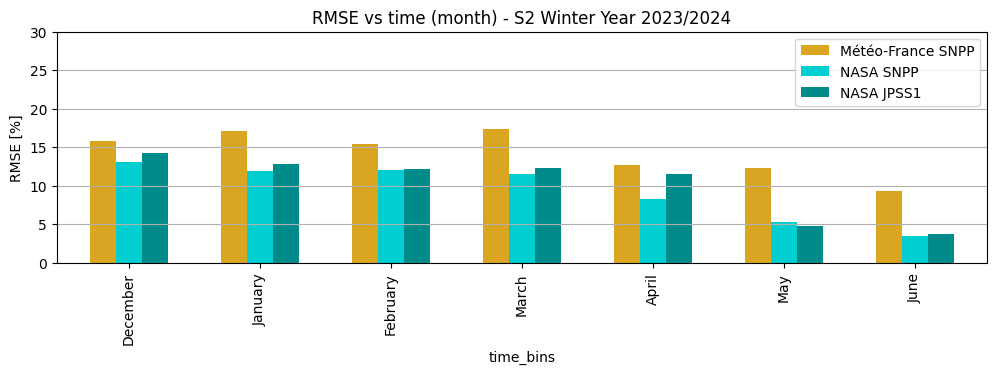

In [4]:
from postprocess.error_distribution import  biais_barplots, postprocess_uncertainty_analysis, rmse_barplots
from reductions.statistics_base import EvaluationVsHighResBase
biais_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='time (month)', title_complement=f"{str(wy)}")
rmse_barplots(postprocess_uncertainty_analysis(selection_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name="time (month)", title_complement=f"{str(wy)}")

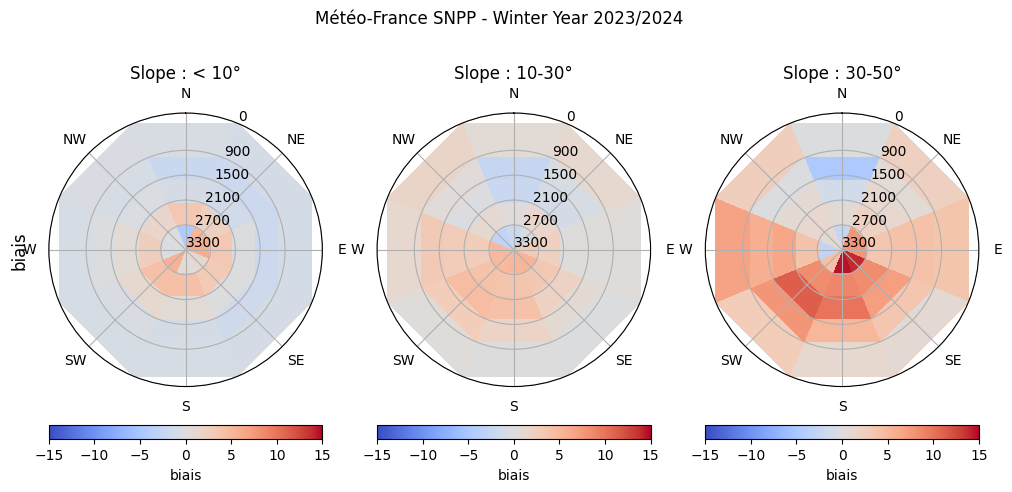

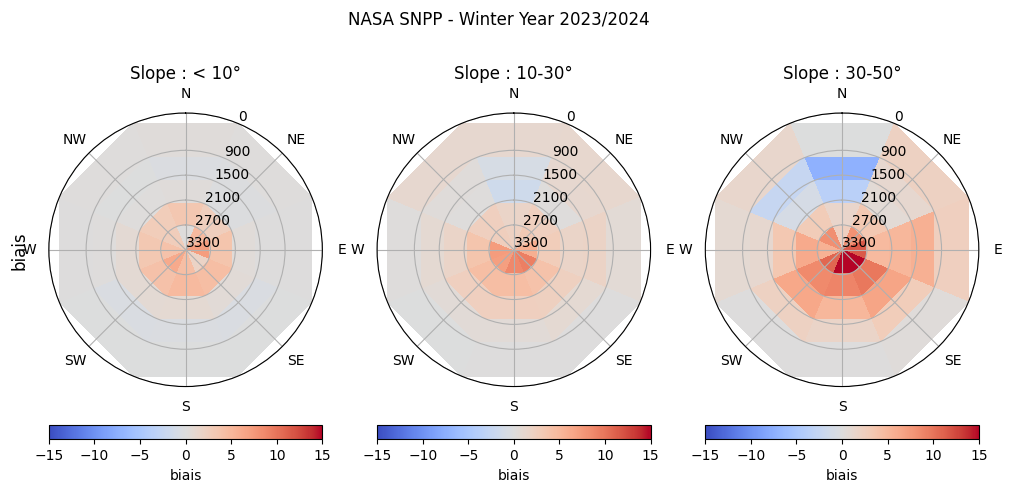

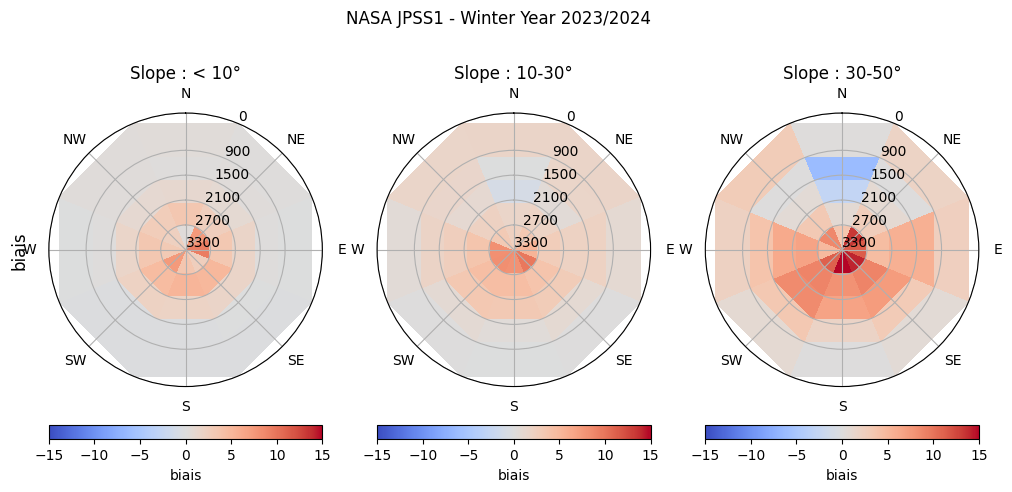

In [6]:
# Semi distirbuted analysis

from postprocess.error_distribution import semidistributed_geometry_plot

semidistributed_geometry_plot(selection_dict, 'biais', title_complement=f"{str(wy)}")

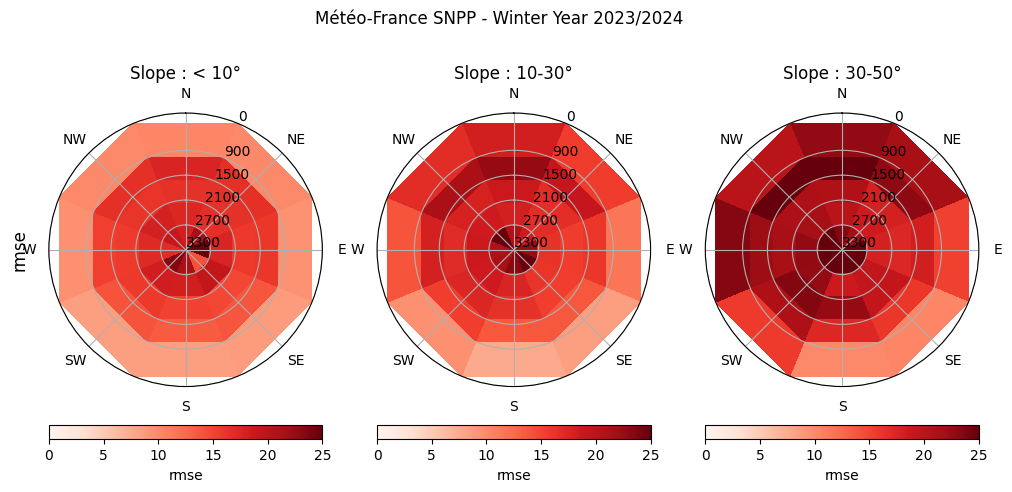

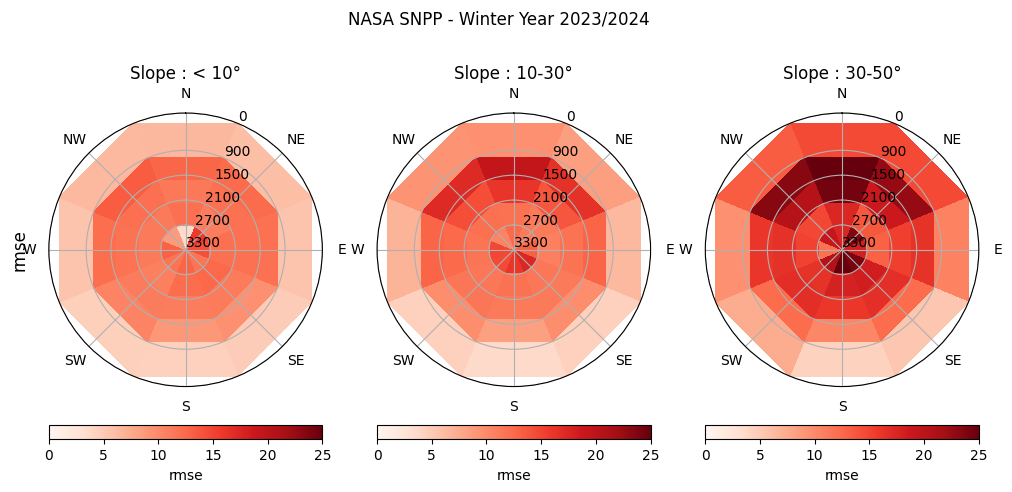

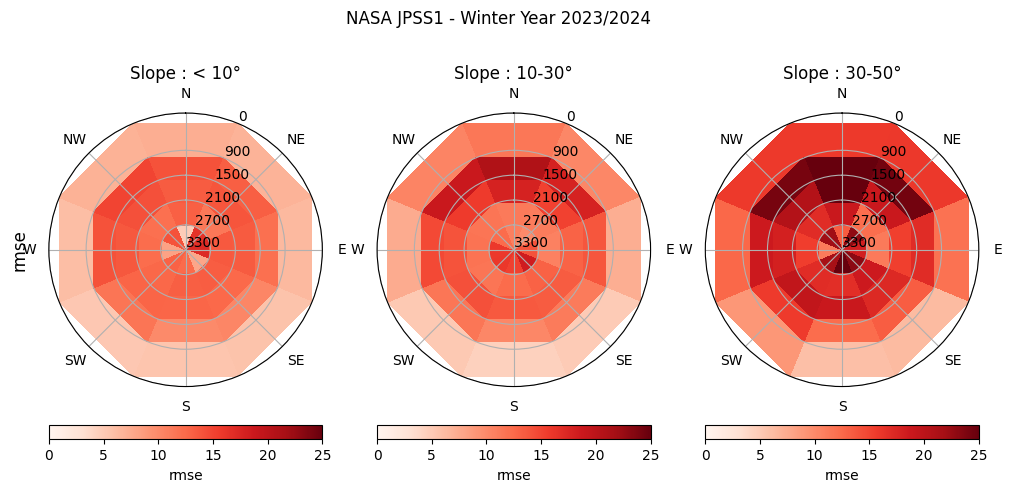

In [5]:
# Semi distirbuted analysis

from postprocess.error_distribution import semidistributed_geometry_plot

# Version 3
semidistributed_geometry_plot(selection_dict, 'rmse', title_complement=f"{str(wy)}")

/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/src/postprocess/error_distribution.py:206: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  plot_biais = sns.catplot(
/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/src/postprocess/error_distribution.py:217: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  plot_rmse = sns.catplot(


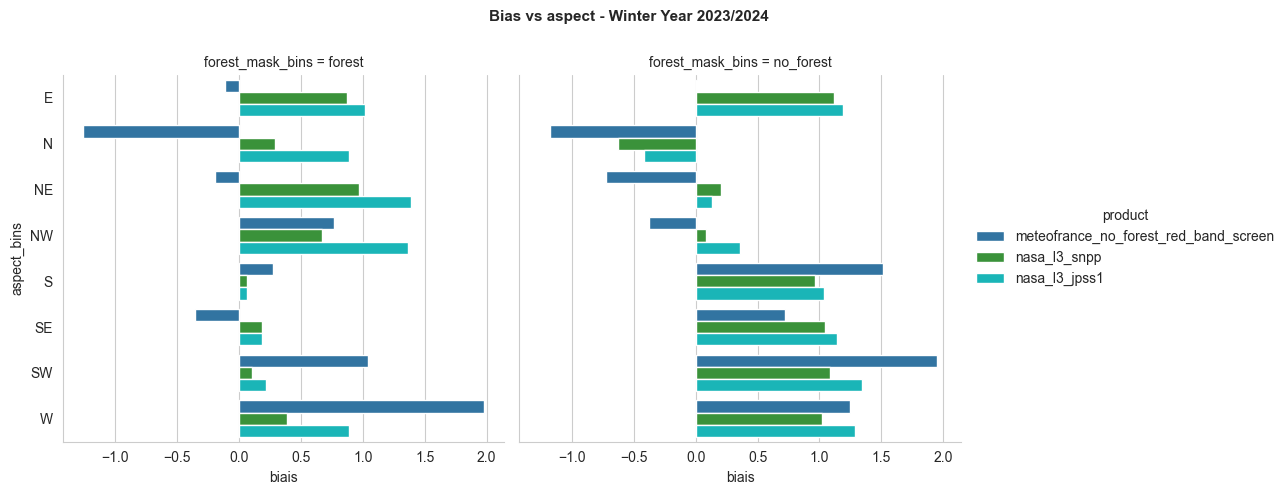

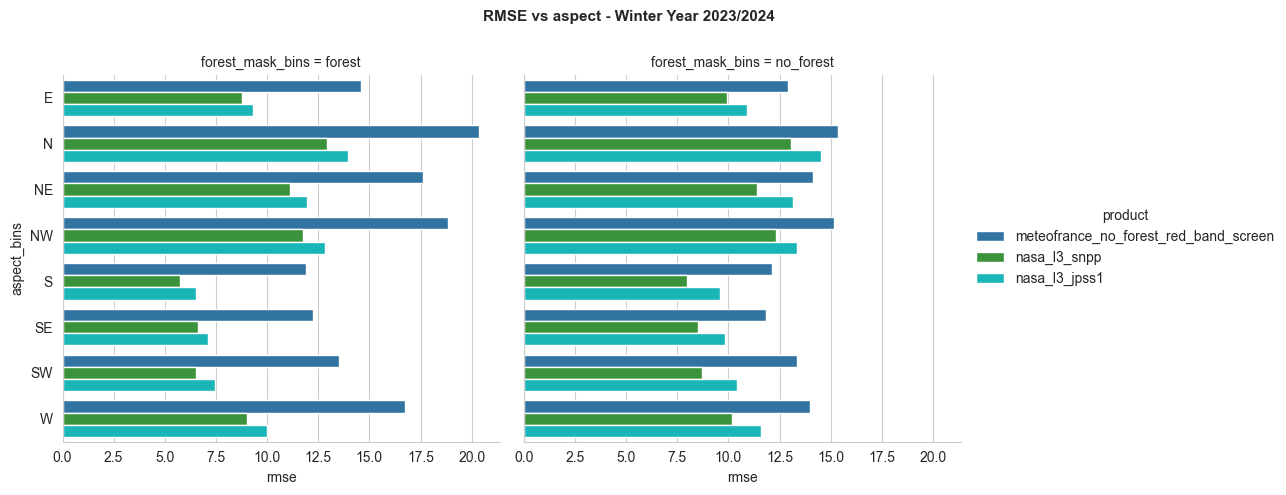

In [2]:
from postprocess.error_distribution import double_variable_barplots

double_variable_barplots(analyses_dict=selection_dict, var1='forest_mask_bins', var2='aspect_bins', title_complement=str(wy) )

/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/src/postprocess/error_distribution.py:320: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel("Difference [\% FSC]")
/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/src/postprocess/error_distribution.py:391: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel("RMSE [\% FSC]")


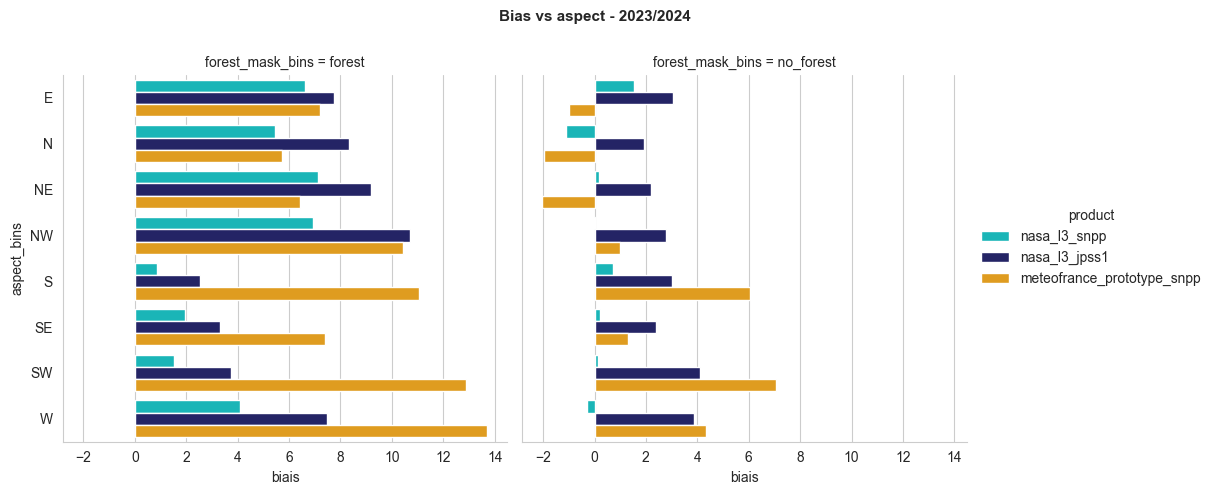

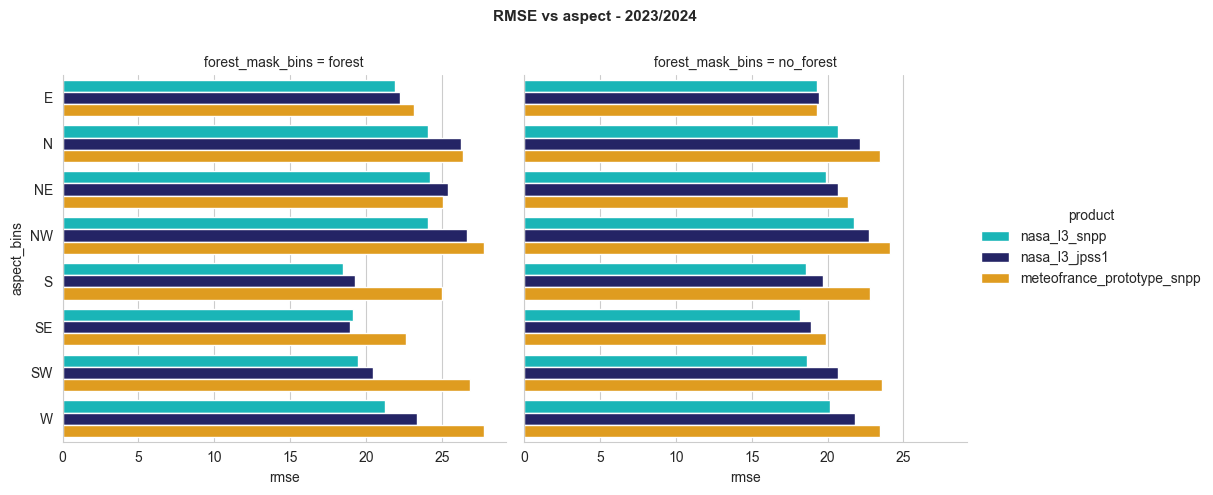

In [1]:
from postprocess.error_distribution import double_variable_barplots

from products.snow_cover_product import MeteoFranceSNPPPrototype, VNP10A1, VJ110A1

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_8/'
product_list = [ VNP10A1(), VJ110A1(), MeteoFranceSNPPPrototype()]

double_variable_barplots(snow_cover_products=product_list,analysis_folder=analysis_folder, var1='forest_mask_bins', var2='aspect_bins', title_complement='2023/2024' )

In [6]:
# General
from postprocess.error_distribution import histograms_to_biais_rmse, fancy_table_error_distribution
import pandas as pd


reduced_datasets = []
for dataset in selection_dict.values():
    reduced_datasets.append(histograms_to_biais_rmse(dataset.groupby('time.month').sum()))
concatenated = xr.concat(reduced_datasets, pd.Index([prod.plot_name for prod in product_list], name="product"), coords="minimal")
reduced_df = concatenated.to_dataframe().reset_index('product')
fancy_table_error_distribution(reduced_df)

product,biais,rmse,unbiaised_rmse
Météo-France SNPP,0.41,14.73,14.72
NASA VIIRS SNPP,0.53,9.80,9.79
NASA VIIRS JPSS1,0.80,10.84,10.81
